# Business Case:- CAR PRICE PREDICTION WITH MACHINE LEARNING
Problem Statement:- The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learnin

# import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [2]:
data = pd.read_csv("CarPrice.csv")

# see the data 

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# basic checks

In [4]:
# check row and columns
data.shape

(205, 26)

In [5]:
# first 5 row 
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# first 5 last row
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
# any data viwe 5 row
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
88,89,-1,mitsubishi mirage g4,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.460,7.5,116,5500,23,30,9279.0
23,24,1,dodge d200,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.390,7.6,102,5500,24,30,7957.0
142,143,0,subaru brz,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.640,9.5,82,4400,28,33,7775.0
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
102,103,0,nissan fuga,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.270,9.0,152,5200,17,22,14399.0


In [8]:
# check the column
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
# check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
# statastical summary of numerical columns
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
num_col = data.select_dtypes(include =['int' , 'float'])
num_col.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
cat_col = data.select_dtypes(include='O')
cat_col.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [14]:
# check the all categorical column unique value
for i in cat_col:
    print(i ,cat_col[i].unique())
    print(cat_col[i].value_counts())
    print("--------------------------------------------------------------------------------------------------------")

CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

# EDA

# univariate analysis


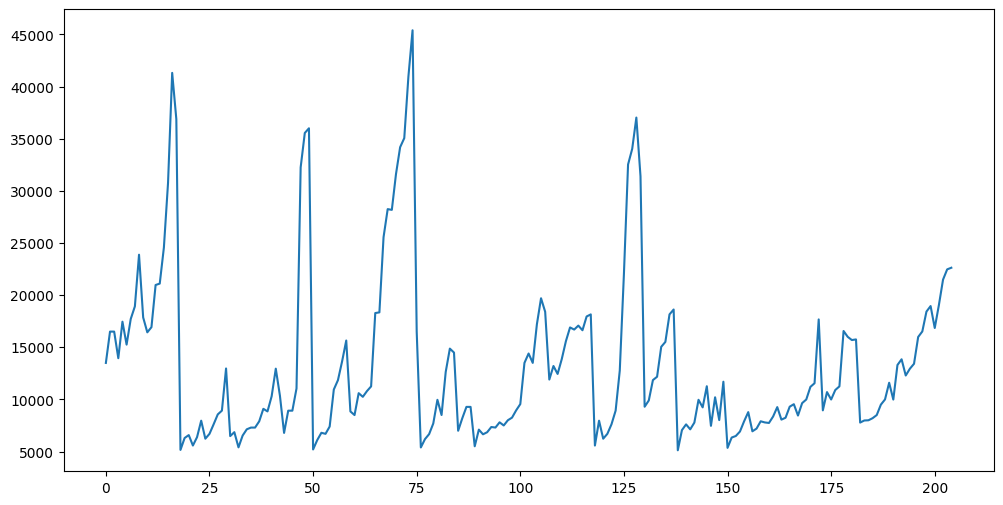

In [15]:
plt.figure(figsize = (12,6))
plt.plot(data["price"])

In [16]:
# # ploting histograms for numerical columns
# plt.figure(figsize = (25,20) , facecolor = "white")

# plotnumber = 1

# for i in data:
#     if plotnumber<=26:
#         ax = plt.subplot(7,4 , plotnumber)
#         sns.histplot(x=data[i] , kde = True)
#         plt.xlabel(i , fontsize = 15)
#     plotnumber +=1
# plt.tight_layout()

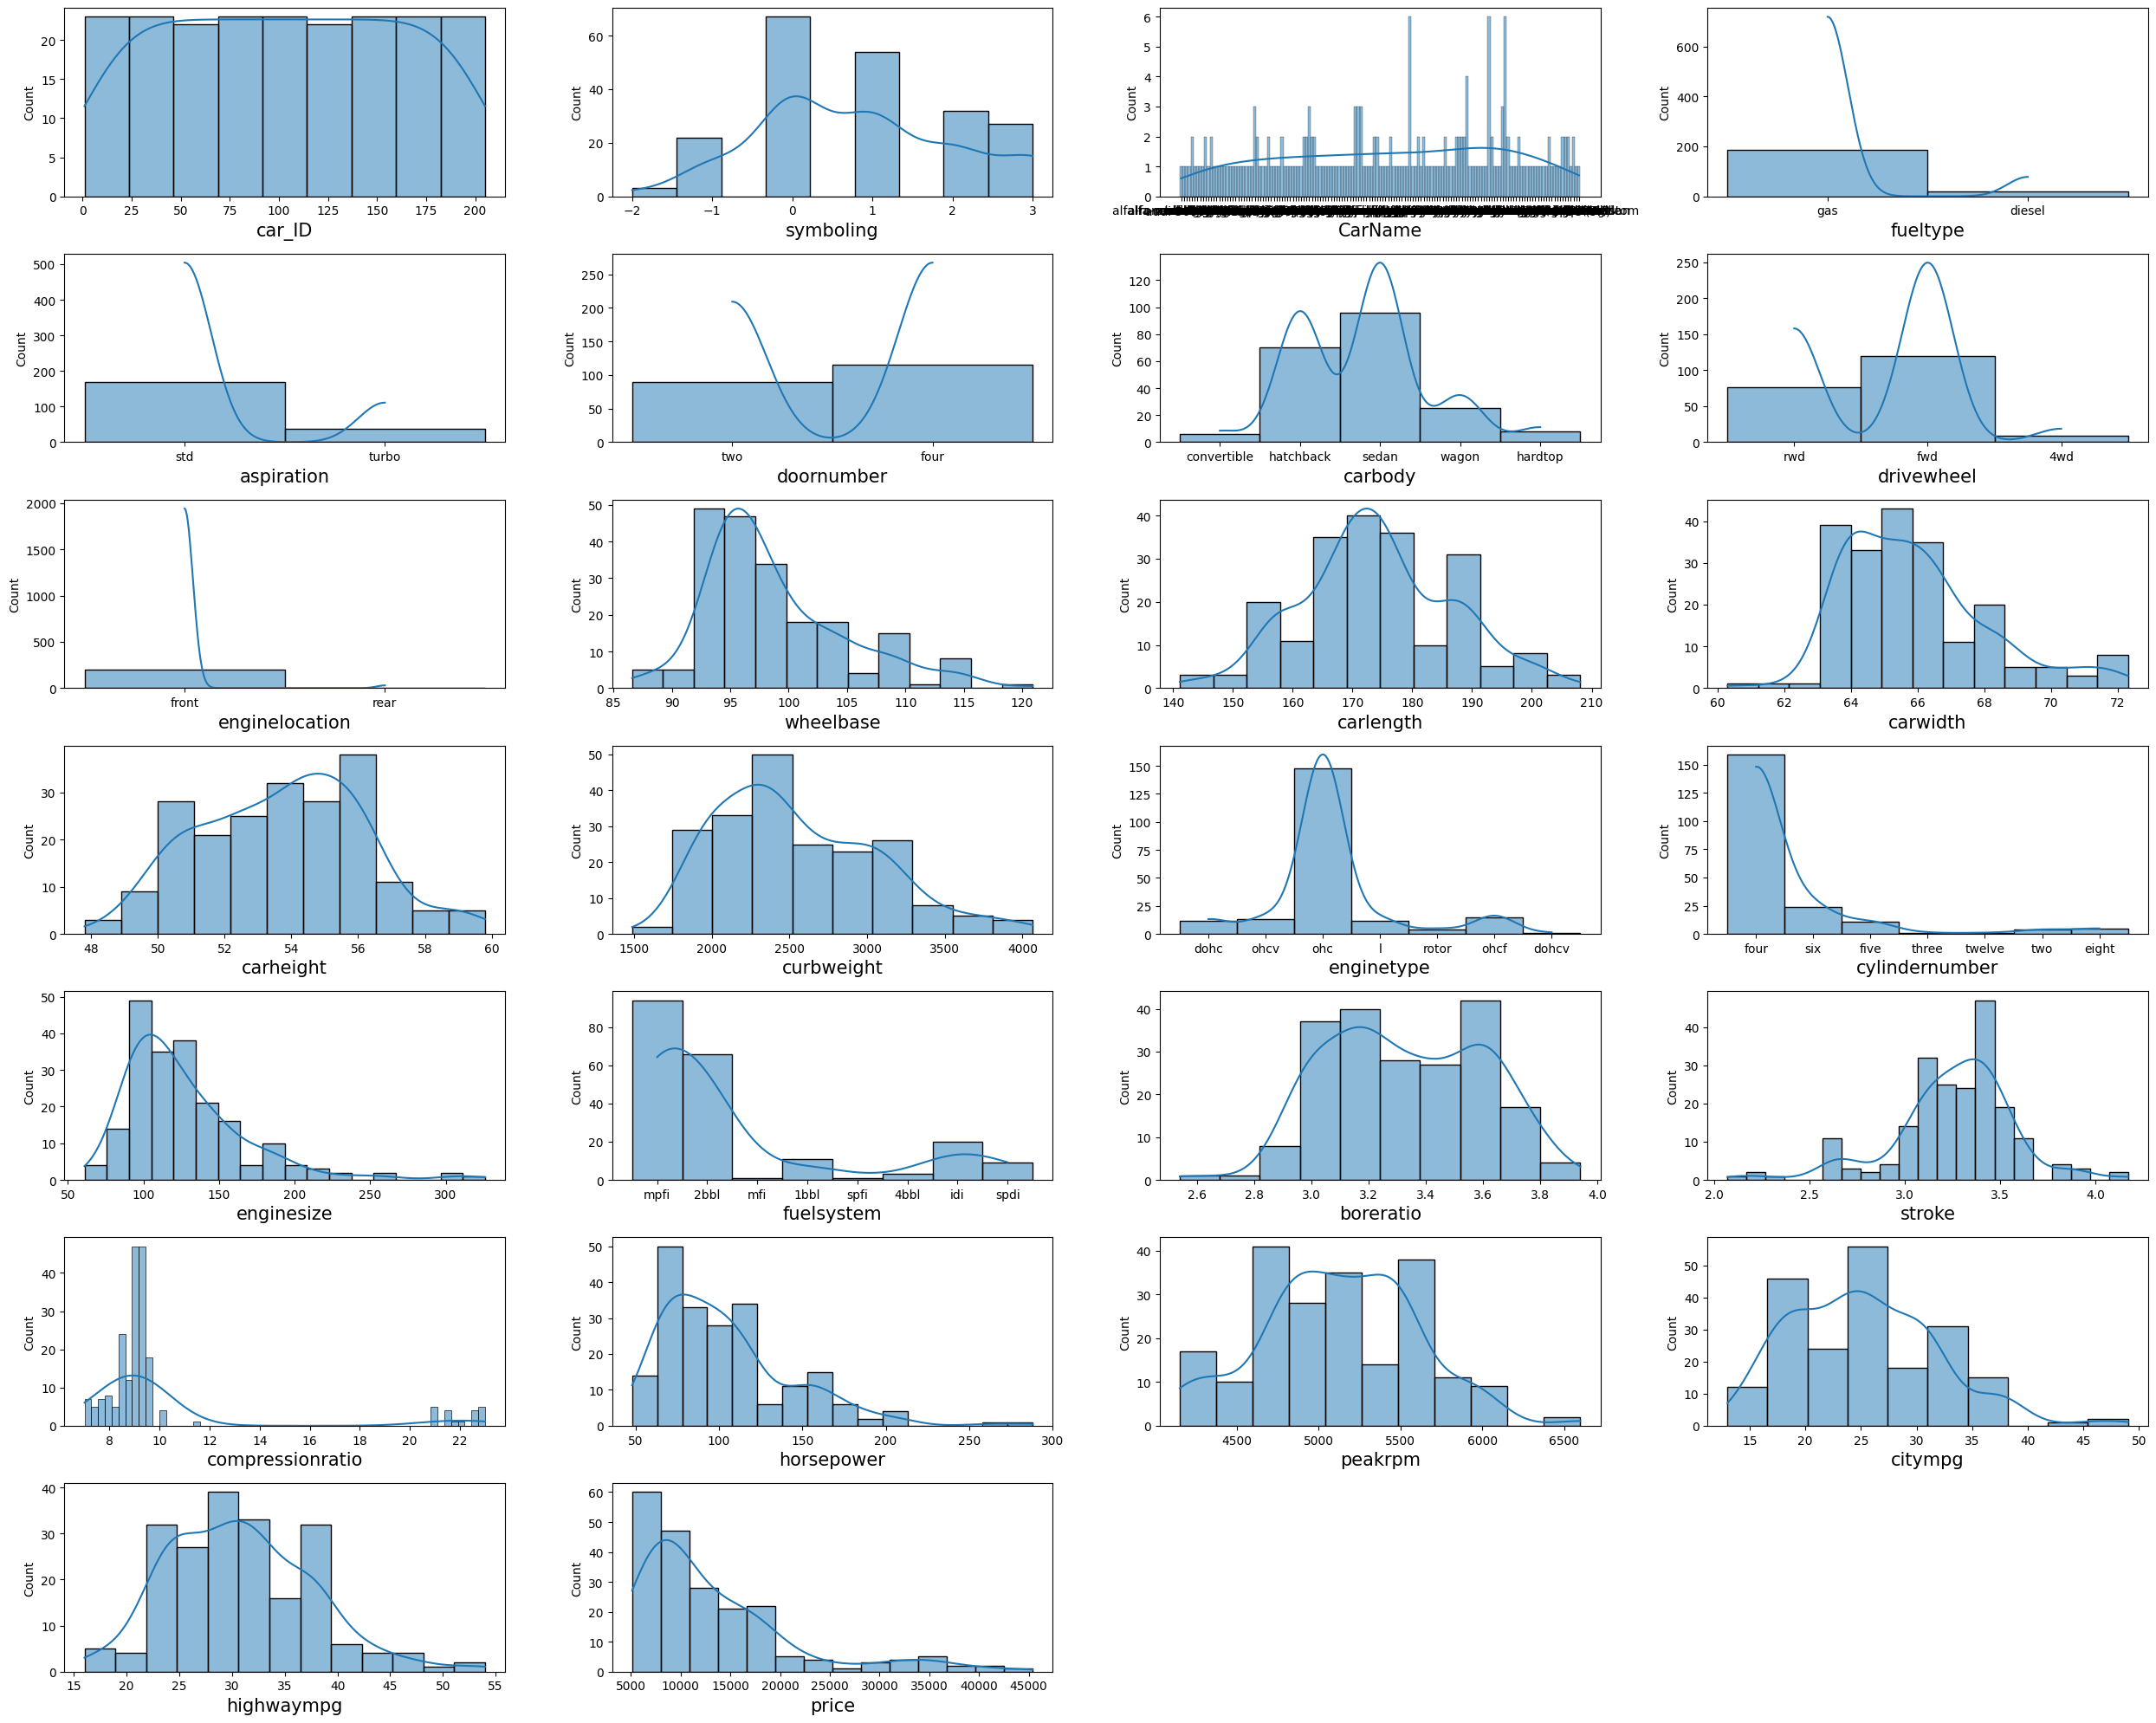

In [17]:
plt.figure(figsize = (25,20) , facecolor = 'white')
plotnumber = 1

for i in data:
    if plotnumber<=26:
        ax = plt.subplot(7,4 , plotnumber)
        sns.histplot(x =data[i] , kde = True)
        plt.xlabel(i , fontsize = 15)
    plotnumber +=1
plt.tight_layout()

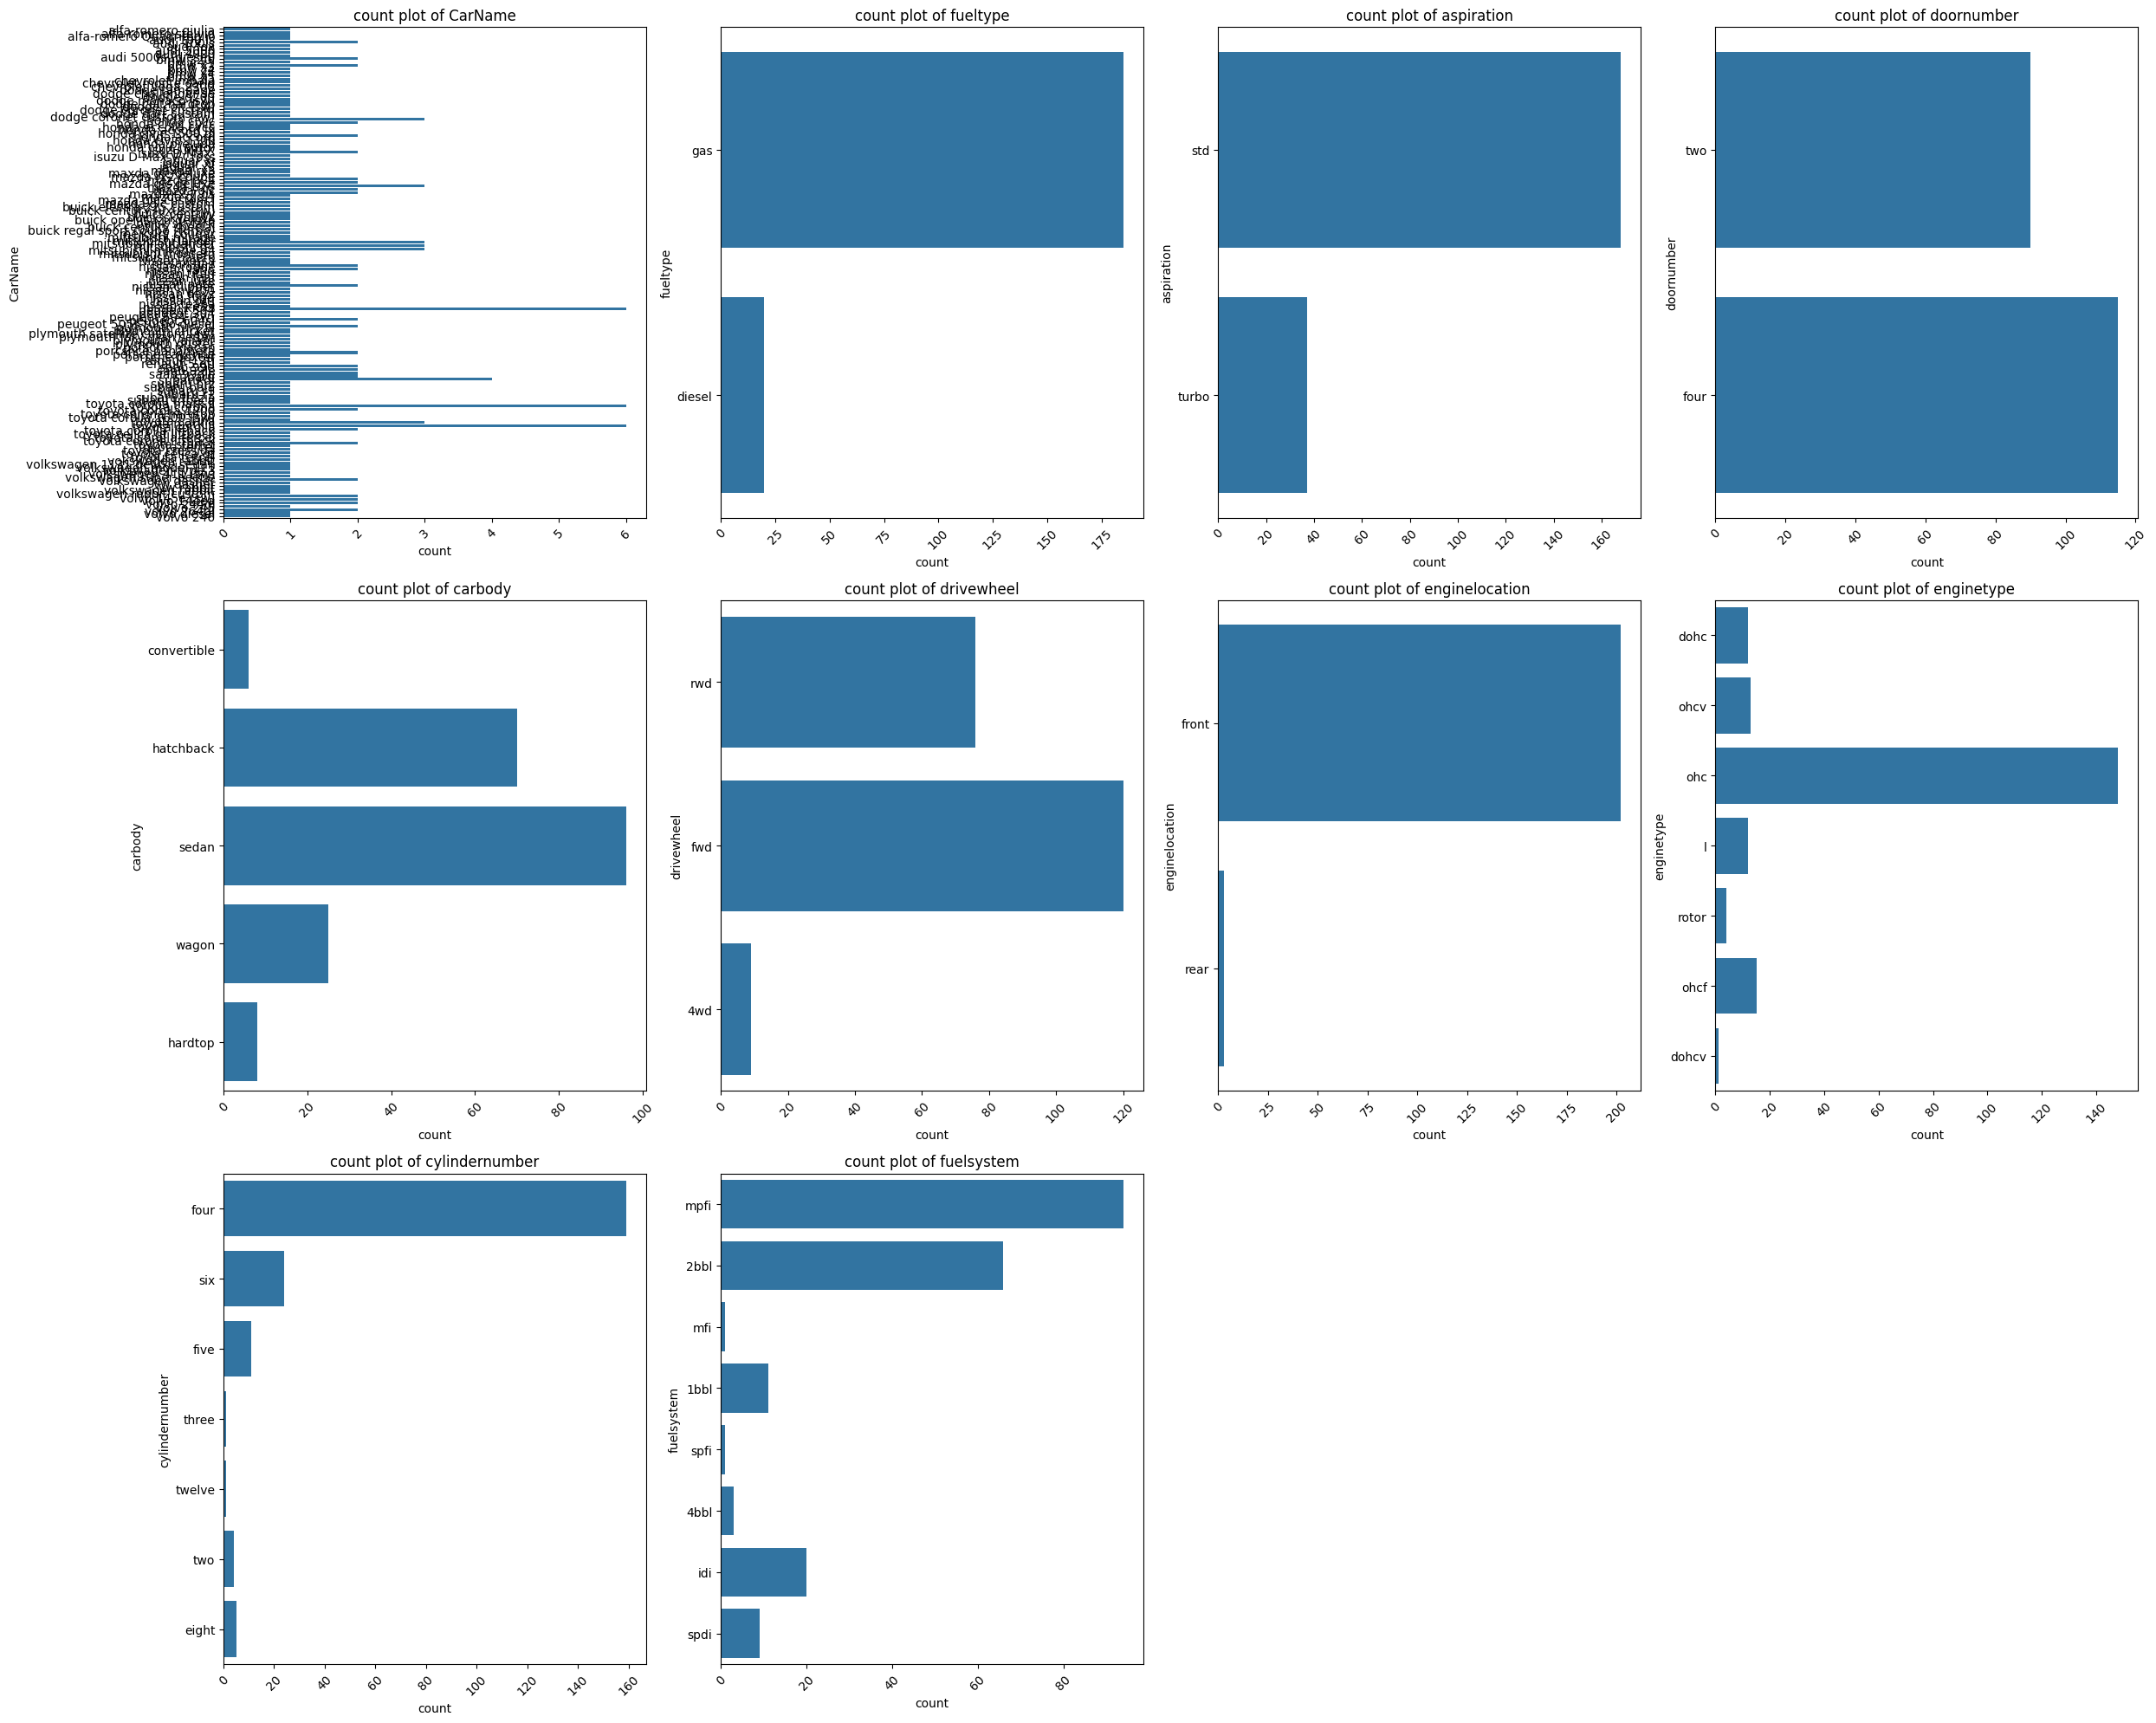

In [18]:
# cout plot for categorical columns:-

plt.figure(figsize = (25,20) , facecolor = 'white')
for i , column in enumerate(cat_col , 1):
    plt.subplot(3,4 , i)
    sns.countplot(data[column])
    plt.title(f'count plot of {column}')
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

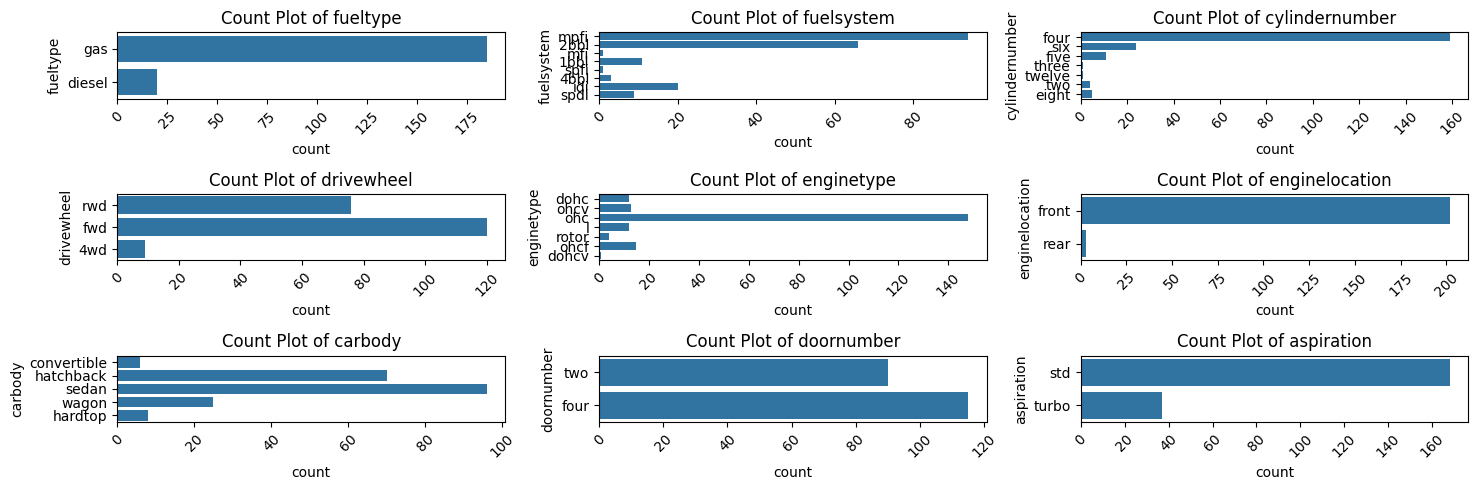

In [19]:
# count plot for categorical column:-
categorical_columns = ["fueltype","fuelsystem", "cylindernumber", "drivewheel" , "enginetype" , "enginelocation", "carbody", "doornumber" , "aspiration"]

plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data[column])
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

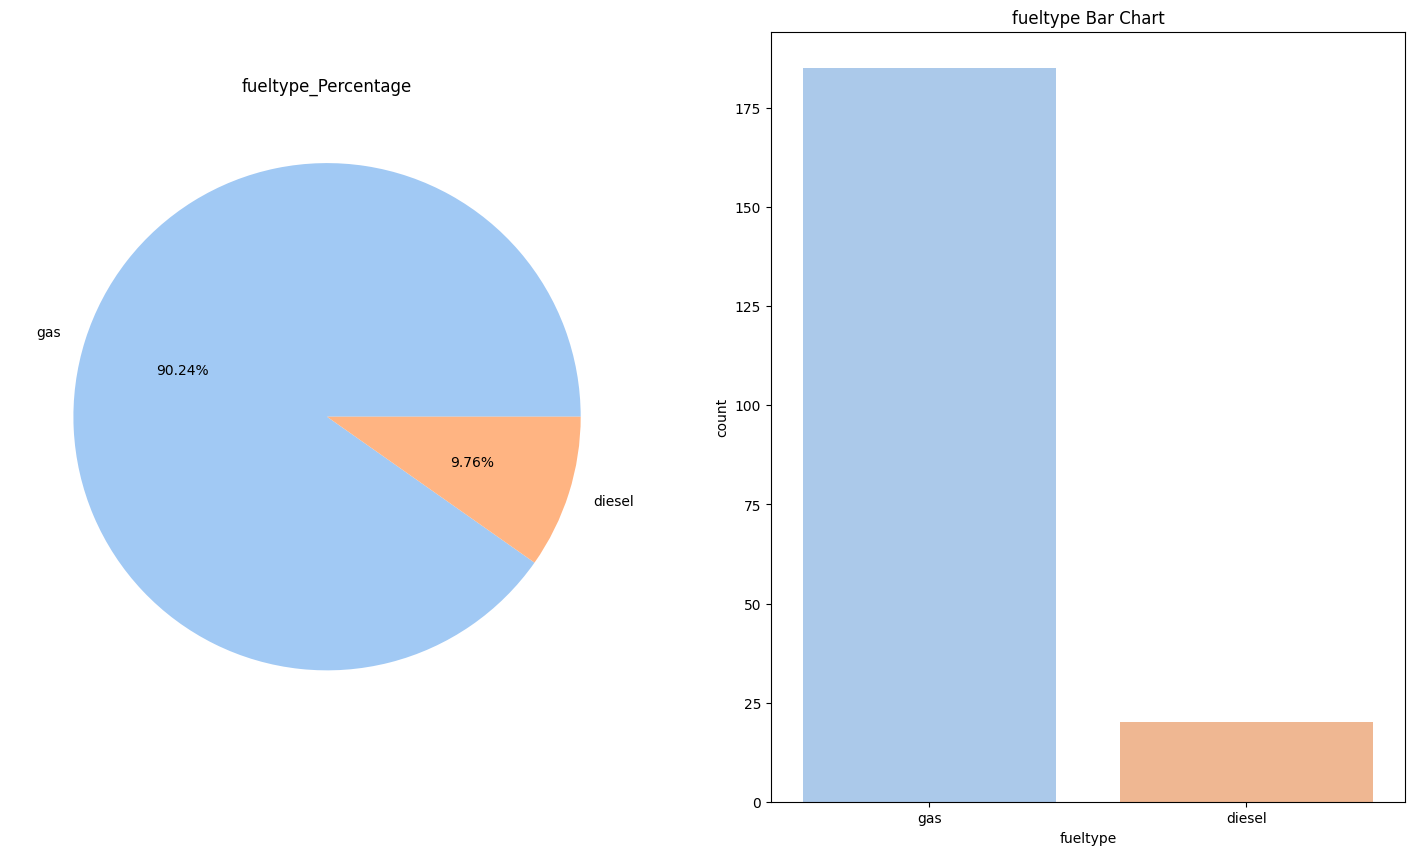

In [20]:
#fueltype
colors=sns.color_palette('pastel')
labels=data['fueltype'].dropna().unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('fueltype_Percentage')
plt.pie(data['fueltype'].value_counts(),labels=labels,colors=colors,autopct='%.2f%%')
plt.subplot(1,2,2)
plt.title('fueltype Bar Chart')
sns.countplot(x="fueltype",data=data,palette=colors)
data.fueltype.value_counts(dropna=False)

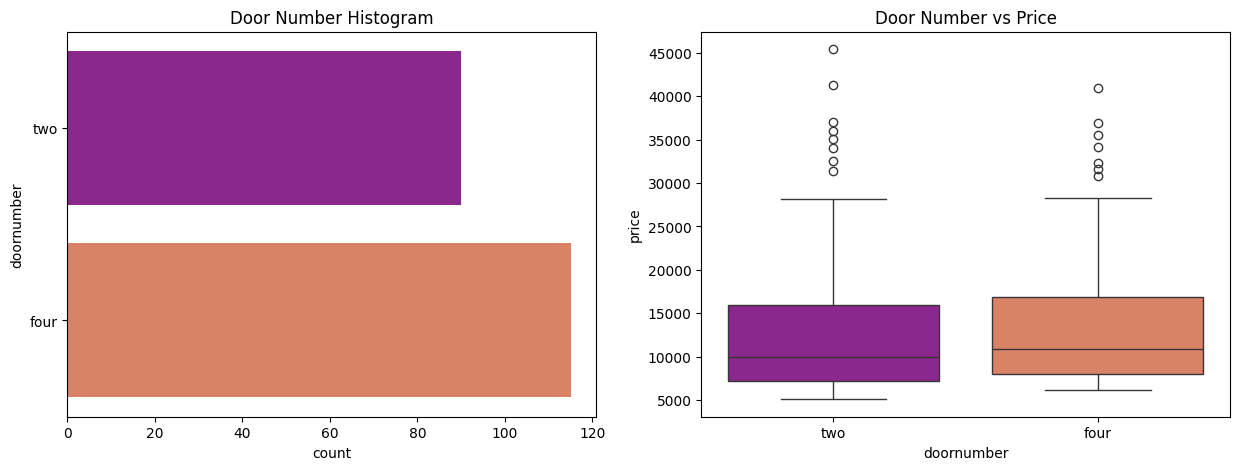

In [21]:
plt.figure(figsize=(15,5)),
plt.subplot(1,2,1)
plt.title("Door Number Histogram")
sns.countplot(data.doornumber,palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber,y=data.price,palette=("plasma"))
plt.show()

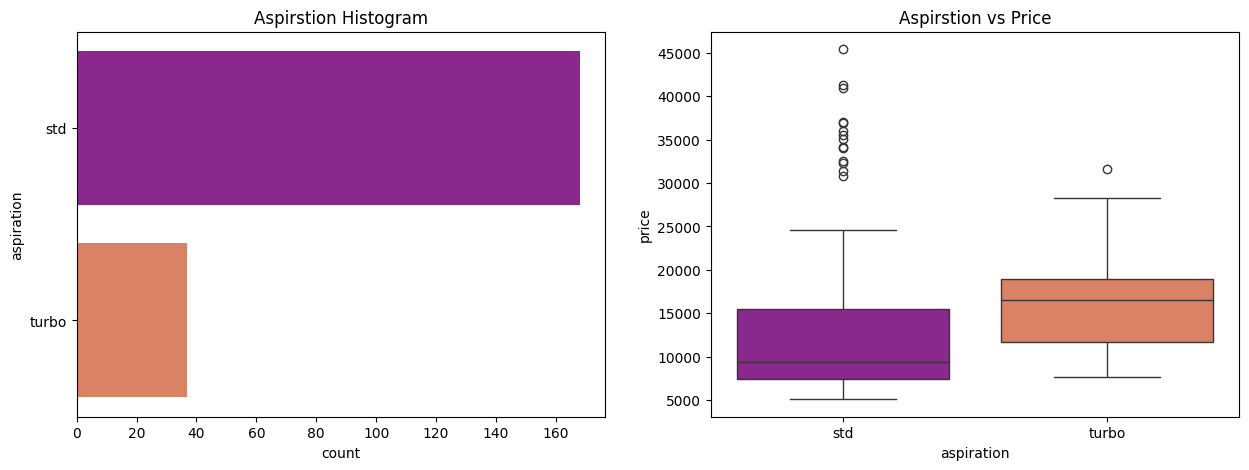

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspirstion Histogram')
sns.countplot(data.aspiration,palette=("plasma"))
plt.subplot(1,2,2)
plt.title("Aspirstion vs Price")
sns.boxplot(x=data.aspiration,y=data.price,palette=("plasma"))
plt.show()

In [23]:
#sns.pairplot(data)

# data preprocessing

In [24]:
# check the null value
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [25]:
# check the duplicate value

data.duplicated().sum()

0

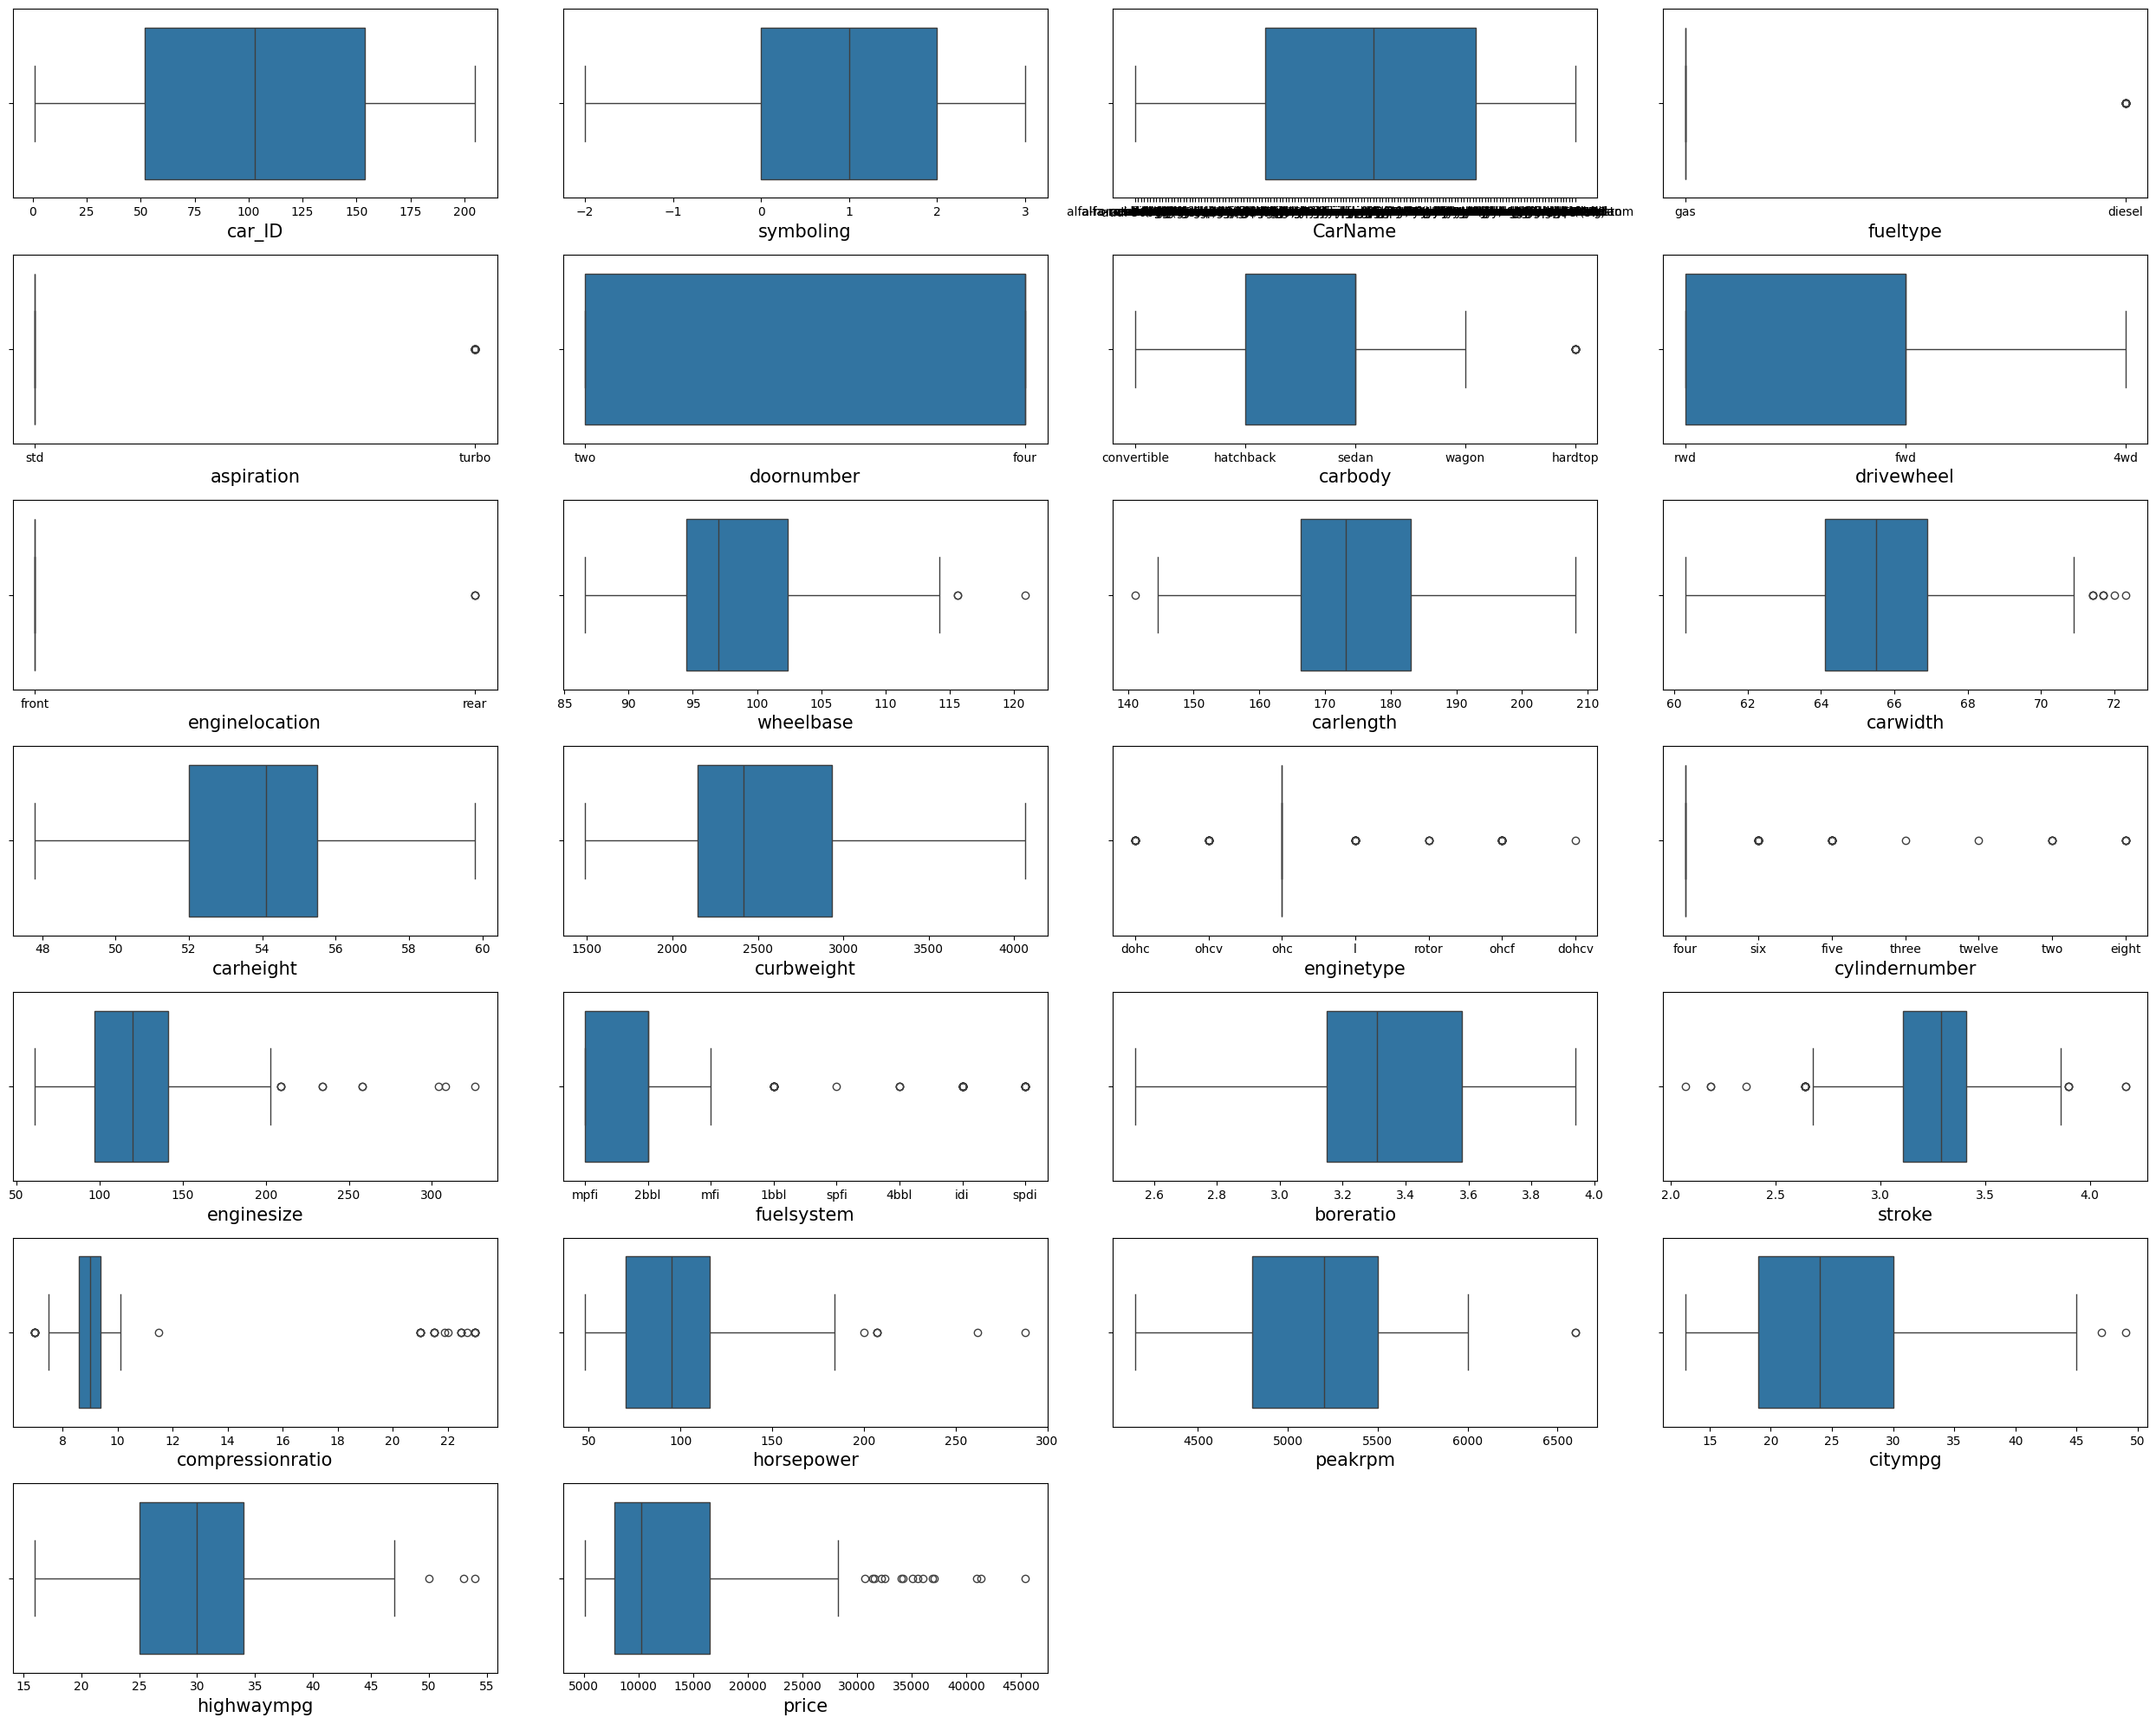

In [26]:
# check and handle outliers

plt.figure(figsize = (25,20))
plotnumber = 1

for i in data:
    if plotnumber<=26:
        ax = plt.subplot(7, 4 , plotnumber)
        sns.boxplot(x = data[i])
        plt.xlabel(i , fontsize = 15)
    plotnumber +=1
plt.tight_layout()

In [27]:
# highwaympg  horsepower , peakrpm ,citympg , compressionration
#

In [28]:
#len(data.loc[data['Total_Bilirubin']>upper_limit])/len(data)*100

In [29]:
# wheelbase

In [30]:
q1 = data["wheelbase"].quantile(0.25)
print(q1)

94.5


In [31]:
q3 = data["wheelbase"].quantile(0.75)
print(q3)

102.4


In [32]:
IQR = q3 - q1
print(IQR)

7.900000000000006


In [33]:
min_range = q1-(1.5 * IQR)
print(min_range)

82.64999999999999


In [34]:
max_range = q3 +(1.5 * IQR)
print(max_range)

114.25000000000001


In [35]:
data.loc[data["wheelbase"]>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


In [36]:
len(data.loc[data["wheelbase"]>max_range])/len(data)*100

1.4634146341463417

In [37]:
data.loc[data["wheelbase"]>max_range , "wheelbase"] = data["wheelbase"].median()

In [38]:
# carwidth

In [39]:
q1 = data["carwidth"].quantile(0.25)
print(q1)

64.1


In [40]:
q3 = data["carwidth"].quantile(0.75)
print(q3)

66.9


In [41]:
IQR = q3 - q1
print(IQR)

2.8000000000000114


In [42]:
min_range = q1 - (1.5 * IQR)
print(min_range)

59.89999999999998


In [43]:
max_range = q3 + (1.5 * IQR)
print(max_range)

71.10000000000002


In [44]:
data.loc[data["carwidth"]>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [45]:
data.loc[data['carwidth']<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [46]:
len(data.loc[data['carwidth']>max_range]) / len(data)*100

3.902439024390244

In [47]:
data.loc[data['carwidth']>max_range ,'carwidth'] = data['carwidth'].median()

In [48]:
# enginesize

In [49]:
q1 = data["enginesize"].quantile(0.25)
print(q1)

97.0


In [50]:
q3 = data.enginesize.quantile(0.75)
print(q3)

141.0


In [51]:
iqr = q3 - q1
iqr

44.0

In [52]:
min_range = q1 - (1.5 * iqr)
print(min_range)

31.0


In [53]:
max_range = q3 + (1.5 * iqr)
print(max_range)

207.0


In [54]:
data.loc[data['enginesize']>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [55]:
data.loc[data['enginesize']<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [56]:
len(data.loc[data['enginesize']>max_range])/len(data)*100

4.878048780487805

In [57]:
# 	horsepower

In [58]:
q1 = data["horsepower"].quantile(0.25)
print(q1)

70.0


In [59]:
q3 = data["horsepower"].quantile(0.75)
print(q3)

116.0


In [60]:
iqr = q3 - q1
iqr

46.0

In [61]:
min_range = q1 - (1.5 * iqr)
print(min_range)

1.0


In [62]:
max_range = q3 + (1.5 * iqr)
print(max_range)

185.0


In [63]:
data.loc[data["horsepower"]<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [64]:
data.loc[data['horsepower']>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
105,106,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699.0
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [65]:
data.loc[data["horsepower"]>max_range , 'horsepower'] = data['horsepower'].median()

In [66]:
# stroke

In [67]:
q1 = data["stroke"].quantile(0.25)
print(q1)

3.11


In [68]:
q3 = data["stroke"].quantile(0.75)
print(q3)

3.41


In [69]:
iqr = q3 - q1
iqr

0.30000000000000027

In [70]:
min_range = q1 - (1.5 * iqr)
print(min_range)

2.6599999999999993


In [71]:
max_range = q3 + (1.5 * iqr)
print(max_range)

3.8600000000000003


In [72]:
data.loc[data["stroke"]<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0
141,142,0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0
142,143,0,subaru brz,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775.0
143,144,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.0
144,145,0,subaru r1,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233.0


In [73]:
data.loc[data["stroke"]>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9895.0


In [74]:
data.loc[data['stroke']>max_range , 'stroke'] = data['stroke'].median()

In [75]:
data.loc[data["stroke"]>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [76]:
data.loc[data['stroke']<min_range , 'stroke'] = data['stroke'].median()

In [77]:
data.loc[data["stroke"]<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [78]:
# peakrpm

In [79]:
q1 = data['peakrpm'].quantile(0.25)
q1

4800.0

In [80]:
q3 = data['peakrpm'].quantile(0.75)
q3

5500.0

In [81]:
iqr = q3 - q1
iqr

700.0

In [82]:
min_range = q1 - (1.5 * iqr)
min_range

3750.0

In [83]:
max_range = q3 + (1.5*iqr)
max_range

6550.0

In [84]:
data.loc[data['peakrpm']>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
165,166,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0


In [85]:
data.loc[data['peakrpm']<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [86]:
data.loc[data['peakrpm']>max_range , 'peakrpm'] = data['peakrpm'].median()

In [87]:
data.loc[data['peakrpm']>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [88]:
# citympg

In [89]:
q1 = data.citympg.quantile(0.25)
q1

19.0

In [90]:
q3 = data.citympg.quantile(0.75)
q3

30.0

In [91]:
iqr = q3 - q1
iqr

11.0

In [92]:
min_range = q1 - (1.5 * iqr)
min_range

2.5

In [93]:
max_range = q3 + (1.5 * iqr)
max_range

46.5

In [94]:
data.loc[data['citympg']>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0


In [95]:
data.loc[data['citympg']<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [96]:
data.loc[data['citympg']>max_range , 'citympg'] = data['citympg'].median()

In [97]:
data.loc[data['citympg']>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [98]:
# highwaympg

In [99]:
q1 = data["highwaympg"].quantile(0.25)
q1

25.0

In [100]:
q3 = data["highwaympg"].quantile(0.75)
q3

34.0

In [101]:
iqr = q3 - q1
iqr

9.0

In [102]:
min_range = q1 - (1.5 * iqr)
min_range

11.5

In [103]:
max_range = q3 + (1.5 * iqr)
max_range

47.5

In [104]:
data.loc[data["highwaympg"]>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,24,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,24,54,6479.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0


In [105]:
data.loc[data["highwaympg"]<min_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [106]:
data.loc[data["highwaympg"]>max_range , "highwaympg"] = data["highwaympg"].median()

In [107]:
data.loc[data["highwaympg"]>max_range]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [108]:
# scaling the continuous data:

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
num_col.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [111]:
numeric_col = ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

scaler = StandardScaler()

data[numeric_col] = scaler.fit_transform(data[numeric_col])
print(data.head())

     car_ID  symboling                   CarName fueltype aspiration  \
0 -1.723622   1.743470        alfa-romero giulia      gas        std   
1 -1.706724   1.743470       alfa-romero stelvio      gas        std   
2 -1.689826   0.133509  alfa-romero Quadrifoglio      gas        std   
3 -1.672928   0.938490               audi 100 ls      gas        std   
4 -1.656029   0.938490                audi 100ls      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front  -1.774038  ...   
1        two  convertible        rwd          front  -1.774038  ...   
2        two    hatchback        rwd          front  -0.712336  ...   
3       four        sedan        fwd          front   0.241396  ...   
4       four        sedan        4wd          front   0.169416  ...   

   enginesize  fuelsystem  boreratio    stroke compressionratio horsepower  \
0    0.074449        mpfi   0.519071 -3.066632        -0.28834

In [112]:
cat_col

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [113]:
data.drop(columns = "CarName" , axis = 1 , inplace = True)

In [114]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.723622,1.743470,gas,std,two,convertible,rwd,front,-1.774038,-0.426521,...,0.074449,mpfi,0.519071,-3.066632,-0.288349,0.331890,-0.246151,-0.651000,-0.539863,13495.0
1,-1.706724,1.743470,gas,std,two,convertible,rwd,front,-1.774038,-0.426521,...,0.074449,mpfi,0.519071,-3.066632,-0.288349,0.331890,-0.246151,-0.651000,-0.539863,16500.0
2,-1.689826,0.133509,gas,std,two,hatchback,rwd,front,-0.712336,-0.231513,...,0.604046,mpfi,-2.404880,0.879035,-0.288349,1.654501,-0.246151,-0.977695,-0.697516,16500.0
3,-1.672928,0.938490,gas,std,four,sedan,fwd,front,0.241396,0.207256,...,-0.431076,mpfi,-0.517266,0.529419,-0.035973,0.055065,0.858026,-0.160957,-0.066906,13950.0
4,-1.656029,0.938490,gas,std,four,sedan,4wd,front,0.169416,0.207256,...,0.218885,mpfi,-0.517266,0.529419,-0.540725,0.454924,0.858026,-1.141043,-1.328125,17450.0


In [115]:
cat_col = [col for col in cat_col if col in data.columns]  # Keep only existing columns
data = pd.get_dummies(data, columns=cat_col, drop_first=True)


In [116]:
data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.723622,1.743470,-1.774038,-0.426521,-0.873343,-2.020417,-0.014566,0.074449,0.519071,-3.066632,...,False,False,False,False,False,False,False,True,False,False
1,-1.706724,1.743470,-1.774038,-0.426521,-0.873343,-2.020417,-0.014566,0.074449,0.519071,-3.066632,...,False,False,False,False,False,False,False,True,False,False
2,-1.689826,0.133509,-0.712336,-0.231513,-0.092504,-0.543527,0.514882,0.604046,-2.404880,0.879035,...,False,False,False,False,False,False,False,True,False,False
3,-1.672928,0.938490,0.241396,0.207256,0.297916,0.235942,-0.420797,-0.431076,-0.517266,0.529419,...,False,False,False,False,False,False,False,True,False,False
4,-1.656029,0.938490,0.169416,0.207256,0.409465,0.235942,0.516807,0.218885,-0.517266,0.529419,...,False,False,False,False,False,False,False,True,False,False


In [117]:
data.shape

(205, 45)

<Axes: >

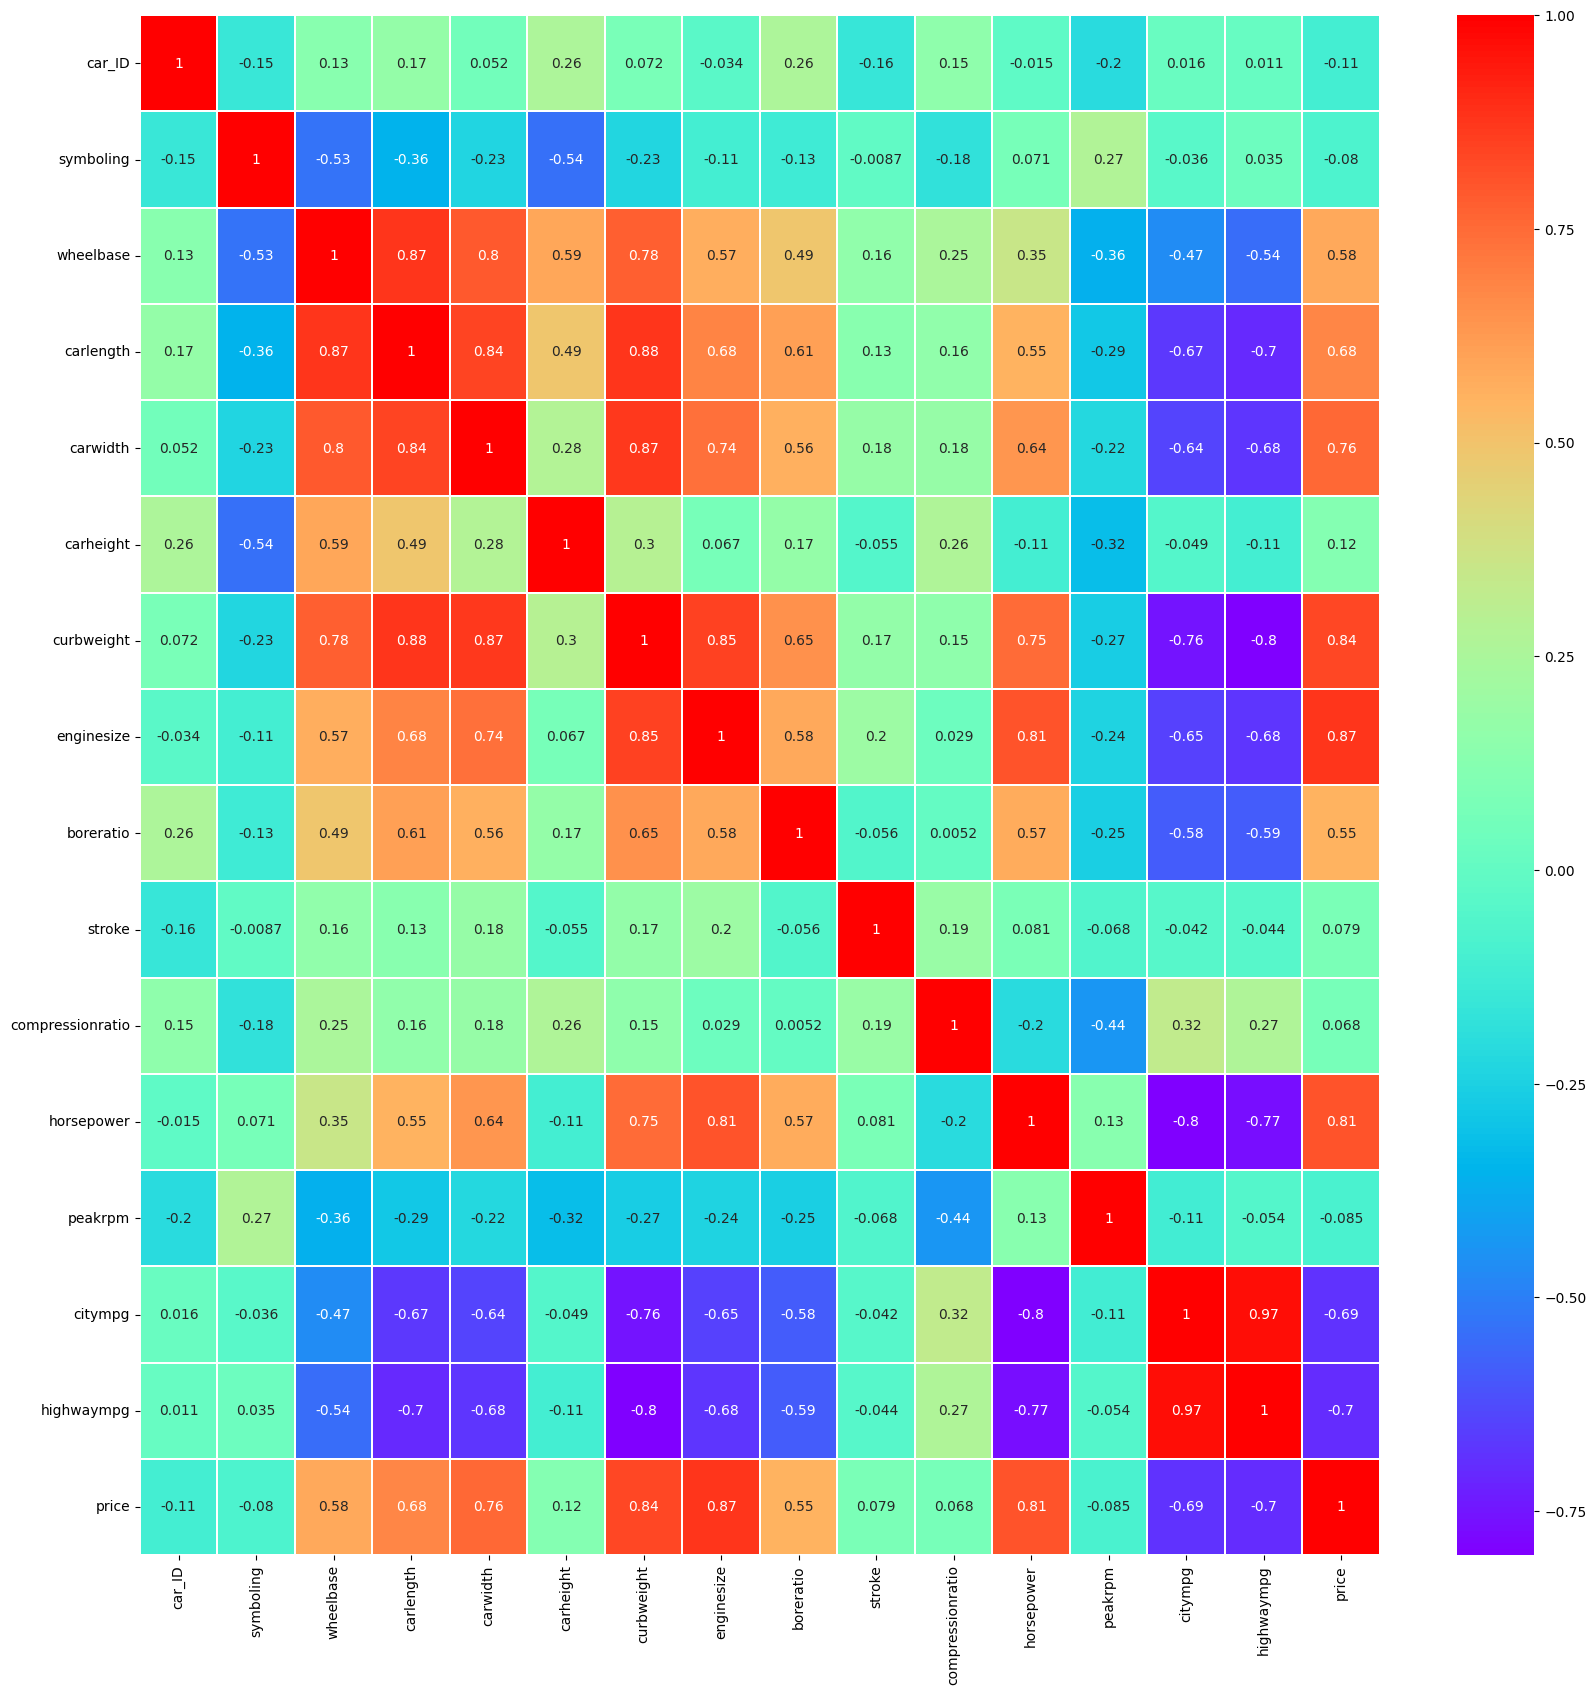

In [118]:
# feature selection

plt.figure(figsize = (20 ,20))
sns.heatmap(num_col.corr(),annot = True , linewidth = 0.10 , cmap = 'rainbow')

In [119]:
# car_ID , symboling , citympg , highmpg

In [120]:
column_to_remove = ["car_ID" , "symboling" , "citympg" , "highwaympg"]
data = data.drop(columns = column_to_remove)


In [121]:
data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.774038,-0.426521,-0.873343,-2.020417,-0.014566,0.074449,0.519071,-3.066632,-0.288349,0.331890,...,False,False,False,False,False,False,False,True,False,False
1,-1.774038,-0.426521,-0.873343,-2.020417,-0.014566,0.074449,0.519071,-3.066632,-0.288349,0.331890,...,False,False,False,False,False,False,False,True,False,False
2,-0.712336,-0.231513,-0.092504,-0.543527,0.514882,0.604046,-2.404880,0.879035,-0.288349,1.654501,...,False,False,False,False,False,False,False,True,False,False
3,0.241396,0.207256,0.297916,0.235942,-0.420797,-0.431076,-0.517266,0.529419,-0.035973,0.055065,...,False,False,False,False,False,False,False,True,False,False
4,0.169416,0.207256,0.409465,0.235942,0.516807,0.218885,-0.517266,0.529419,-0.540725,0.454924,...,False,False,False,False,False,False,False,True,False,False


In [122]:
# model creation

In [123]:
x = data.drop('price' , axis = 1)

In [124]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.774038,-0.426521,-0.873343,-2.020417,-0.014566,0.074449,0.519071,-3.066632,-0.288349,0.331890,...,False,False,False,False,False,False,False,True,False,False
1,-1.774038,-0.426521,-0.873343,-2.020417,-0.014566,0.074449,0.519071,-3.066632,-0.288349,0.331890,...,False,False,False,False,False,False,False,True,False,False
2,-0.712336,-0.231513,-0.092504,-0.543527,0.514882,0.604046,-2.404880,0.879035,-0.288349,1.654501,...,False,False,False,False,False,False,False,True,False,False
3,0.241396,0.207256,0.297916,0.235942,-0.420797,-0.431076,-0.517266,0.529419,-0.035973,0.055065,...,False,False,False,False,False,False,False,True,False,False
4,0.169416,0.207256,0.409465,0.235942,0.516807,0.218885,-0.517266,0.529419,-0.540725,0.454924,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.914925,1.198549,1.803822,0.728239,0.763241,0.339248,1.666445,-0.719210,-0.162161,0.424166,...,False,False,False,False,False,False,False,True,False,False
201,1.914925,1.198549,1.748047,0.728239,0.949992,0.339248,1.666445,-0.719210,-0.364062,1.839051,...,False,False,False,False,False,False,False,True,False,False
202,1.914925,1.198549,1.803822,0.728239,0.878757,1.109571,0.926204,-2.117674,-0.338824,1.039333,...,False,False,False,False,False,False,False,True,False,False
203,1.914925,1.198549,1.803822,0.728239,1.273437,0.435538,-1.183483,0.529419,3.244916,0.178099,...,False,False,False,False,False,True,False,False,False,False


In [125]:
y = data.price

In [126]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
# split the data into training and testing

In [177]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state = 42)


In [178]:
X_train.shape

(164, 40)

In [179]:
X_test.shape

(41, 40)

In [ ]:
# import the model 

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
LR = LinearRegression()

In [182]:
LR.fit(X_train , y_train)

LinearRegression()

In [ ]:
# make prediction

In [183]:
y_pred = LR.predict(X_test)
y_pred

array([28153.10238387, 20904.8707613 ,  9691.64585292, 14040.11180714,
       27747.94782351,  6087.04190499,  8333.20807396,  7991.77715152,
        9457.47731397,  8781.57917801, 18678.52208393,  8944.8492317 ,
       16308.82578357,  8747.91748752, 43428.58332429,  6951.02097676,
        5936.51305379, 12928.06083476,  9391.13428818, 10892.72667866,
       10092.25333489, 17279.70036799,  4482.52783333,  2743.64591907,
        6666.5468687 , 28584.97194949, 11676.6017415 , 17191.85279295,
        4536.25237322, 18467.33866378, 28370.13759023,  6238.91969164,
        6365.71037133, 20062.42999538,  7719.44947151, 25909.51465585,
       12181.54409388, 12733.4450118 ,  6895.15229523, 13316.56268026,
        7224.50257734])

In [184]:
y_test.head()

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
Name: price, dtype: float64

In [185]:
# evaluation of model

In [186]:
## check metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

In [187]:
MSE = mean_squared_error(y_test , y_pred)
MSE

8945918.453133086

In [188]:
r2score = r2_score(y_test , y_pred)

In [189]:
print("r2score: " ,r2score)

r2score:  0.8866802279203608


In [190]:
# Example calculation for Adjusted R²
R2 = 0.88  # Your R² score
n = len(data)  # Total number of observations in the dataset
p = len(data.columns) - 1  # Number of predictors (independent variables), minus target variable

adjusted_R2 = 1 - ((1 - R2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R² Score: {adjusted_R2}")


Adjusted R² Score: 0.8507317073170731


In [ ]:
# Ridge regression

In [191]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing and training the Ridge model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Making predictions
y_pred = ridge_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"MSE: {mse}")


R² Score: 0.8781249045913139
MSE: 9621310.076653589


In [ ]:
# decision tree

In [192]:
from sklearn.tree import DecisionTreeRegressor # importing decision tree from sklearn.tree
dt = DecisionTreeRegressor(max_depth=10) # object creation for decision tree
dt.fit(X_train , y_train) # training the model
dt_predict = dt.predict(X_test) # prediction with x_test


# # 2. Initialize and Train Decision Tree Regressor
# dt = DecisionTreeRegressor(
#     random_state=4,         # Fix randomness
#     max_depth=10,             # Optional: Control depth
#     min_samples_split=10,    # Optional: Minimum samples to split
#     min_samples_leaf=5       # Optional: Minimum samples in a leaf
# )
# dt.fit(X_train, y_train)

# # 3. Predict
# dt_predict = dt.predict(X_test)

# # 4. Evaluate
# mse = mean_squared_error(y_test, dt_predict)
# mae = mean_absolute_error(y_test, dt_predict)
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)


In [193]:
r2_score(y_test , dt_predict)

0.859382968020077

In [ ]:
# random forest

In [194]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
rf_predict = rf.predict(X_test)

In [195]:
r2_score (y_test , rf_predict)

0.9548612000757823

In [196]:
mse = mean_squared_error(y_test , rf_predict)
print("mean squared error: " , mse)

mean squared error:  3563438.363700128


In [197]:
mae = mean_absolute_error(y_test , rf_predict)
print("mean absolute error: " , mae)

mean absolute error:  1254.982207317073


In [199]:
## check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,x,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.84712734 0.68737935 0.69516954]
Cross validation Score: 0.7432254126426856
Std : 0.07353855975111792


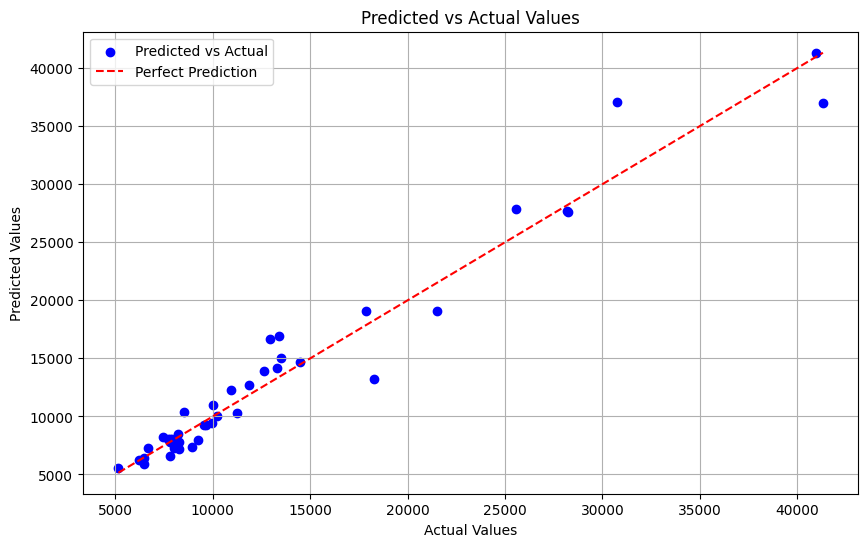

In [200]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predict, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [201]:
## Search Best Paramaters for My Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth':(list(range(1,20))),
              'min_samples_split':(list(range(1,10))),
              'min_samples_leaf':(list(range(1,6))),
              'max_features':['auto','sqrt','log2'],
              'bootstrap':[True,False]
             }


rf2 = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_grid, cv=3, scoring='r2', verbose=2,n_jobs=-1,n_iter=100,random_state=42)

rand_search.fit(X_train, y_train)
best_n_estimators = rand_search.best_params_
print(f'Best Paramaters:{best_n_estimators}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramaters:{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 13, 'bootstrap': False}


In [202]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=150,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=13,bootstrap=False)
rf2.fit(X_train,y_train)
rf_pred2 = rf.predict(X_test)


In [203]:
r2_score(y_test,rf_pred2)

0.9548612000757823

In [204]:
mean_squared_error(y_test,rf_pred2)

3563438.363700128

In [205]:
mean_absolute_error(y_test,rf_pred2)

1254.982207317073

In [ ]:
# XGB

In [206]:
## XGB
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=150)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [207]:
r2_score(y_test,xgb_pred)

0.9310685737322855

In [208]:
mean_squared_error(y_test,xgb_pred)

5441723.9545430355

In [209]:
mean_absolute_error(y_test,xgb_pred)

1543.6755908917683

In [210]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=250,
                   learning_rate=0.06,
                   max_depth=8,
                   min_child_weight=4,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.001,
                   reg_alpha=0.1,
                   reg_lambda=1.5,
                   verbosity=2)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print('r2_score:',r2_score(y_test,xgb_pred))
print('MSE:',mean_squared_error(y_test,xgb_pred))
print('MAE:',mean_absolute_error(y_test,xgb_pred))

r2_score: 0.9211686742955321
MSE: 6223261.822384609
MAE: 1578.6574053925306


In [211]:
# Bagging

In [212]:
## Bagging
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)

In [213]:
r2_score(y_test,bagg_pred)

0.9494092839150572

In [214]:
mean_absolute_error(y_test,bagg_pred)

1356.5971463414635

In [215]:
mean_squared_error(y_test,bagg_pred)

3993834.546926561

In [216]:
# KNN

In [217]:
from sklearn.neighbors import KNeighborsRegressor

In [221]:
## KNN 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('r2_score:',r2_score(y_test,knn_pred))
print('MSE:',mean_squared_error(y_test,knn_pred))
print('MAE:',mean_absolute_error(y_test,knn_pred))

r2_score: 0.7160078954341884
MSE: 22419478.632501356
MAE: 2726.2561056910567


In [ ]:
#GridientBoost

In [222]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
print('r2_score:',r2_score(y_test,GB_pred))
print('MSE:',mean_squared_error(y_test,GB_pred))
print('MAE:',mean_absolute_error(y_test,GB_pred))

r2_score: 0.925137149448835
MSE: 5909974.437021864
MAE: 1715.4790359952494


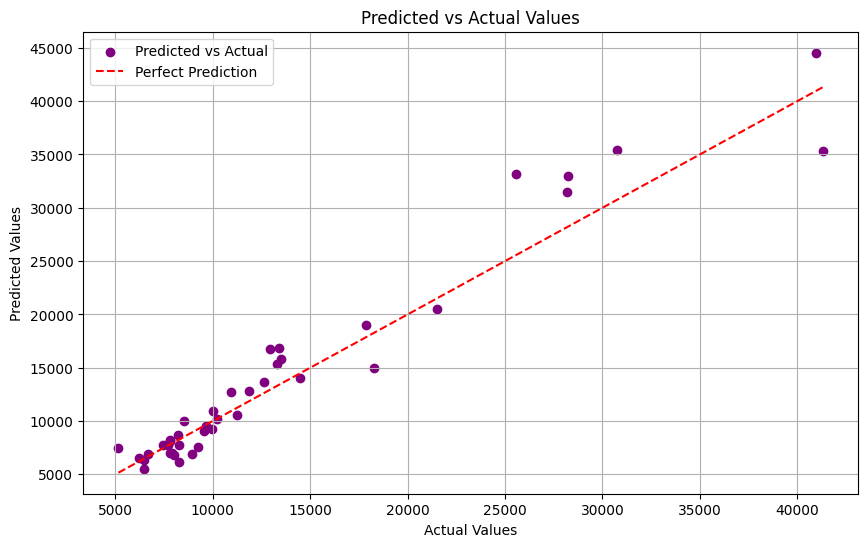

In [223]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GB_pred, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()